In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
mr = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = {'n_estimators': range(10,50,10),
          'max_depth': range(1,12,2),
          'min_samples_leaf': range(1,7),
          'min_samples_split': range(2,9,2)}

In [52]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, params, cv=3, n_jobs=-1)

In [10]:
X = mr.drop(['class'], axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [17]:
y = mr['class']
y

0       0
1       1
2       1
3       0
4       0
       ..
6088    0
6089    1
6090    1
6091    0
6092    1
Name: class, Length: 6093, dtype: int64

In [18]:
grid.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [19]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [25]:
grid.verbose


0

In [22]:
best_rf = grid.best_estimator_

In [23]:
feature_importances = best_rf.feature_importances_

In [24]:
feature_importances_df = pd.DataFrame({'features':X.columns, 'feature_importances' : feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [26]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [34]:
a = grid.predict(test)
a

array([0, 0, 1, ..., 1, 0, 1])

In [31]:
np.sum(grid.predict(test))

976

In [33]:
y_test = pd.read_csv('testing_y_mush.csv')
y_test

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [42]:
from sklearn.metrics import confusion_matrix

xx = confusion_matrix(y_test, a)

In [39]:
final = test
final['class'] = y_test

In [40]:
final

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,3,8,1,3,1,0,0,4,0,...,7,7,0,2,1,4,2,3,3,0
1,5,3,4,1,5,1,0,0,10,1,...,6,6,0,2,1,4,3,5,0,0
2,3,3,4,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
3,3,2,2,0,7,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
4,3,2,2,0,8,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1
2027,5,2,8,1,0,1,0,0,10,0,...,7,7,0,2,1,4,2,2,1,0
2028,5,3,3,0,2,1,0,0,3,0,...,6,0,0,2,1,2,1,4,4,1
2029,5,3,3,1,5,1,0,0,9,1,...,3,3,0,2,1,4,3,4,0,0


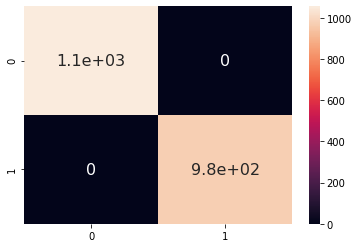

In [43]:
import seaborn as sns

sns.heatmap(xx, annot=True,annot_kws={"size": 16})

In [44]:
star = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
star

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [49]:
y = factors[0]
y = pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,1
4,1
...,...
495,1
496,0
497,1
498,1


In [47]:
factors = pd.factorize(star['class'])
factors

(array([0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0,
        0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0,
        2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0,
        1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 

In [46]:
X = star.drop(['class'], axis=1)
X

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [45]:
stest = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
stest

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [53]:
grid.fit(X,y)

/home/vovka-dobro/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [54]:
grid.best_params_


{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [56]:
a = grid.predict(stest)
a

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
pd.Series(a).value_counts()

1    675
0    595
2    230
dtype: int64

In [60]:
rff = grid.best_estimator_
feature_importances = rff.feature_importances_

In [61]:
feature_importances_df = pd.DataFrame({'features':X.columns, 'feature_importances' : feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.398460
0,g_reflection,0.292714
5,volume,0.162814
2,speed,0.097706
1,i_reflection,0.048306
4,time_of_observance,0.000000


In [63]:
analysis = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
analysis

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [64]:
analysis.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
